In [1]:
from utils import get_label, load_data
import seaborn as sns
import pandas as pd

In [2]:
label = get_label()
train_df, test_df = load_data()

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# make sure we have labels for all train_df
pd.notna(train_df[label]).all()

True

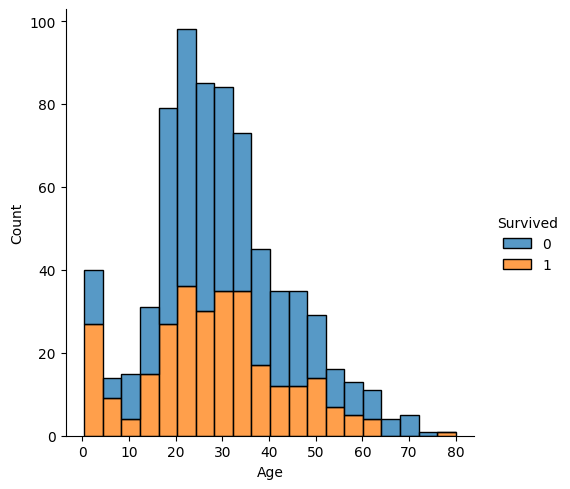

In [6]:
# check age / survived dist
sns.displot(train_df,
            x='Age', hue=label, multiple='stack')

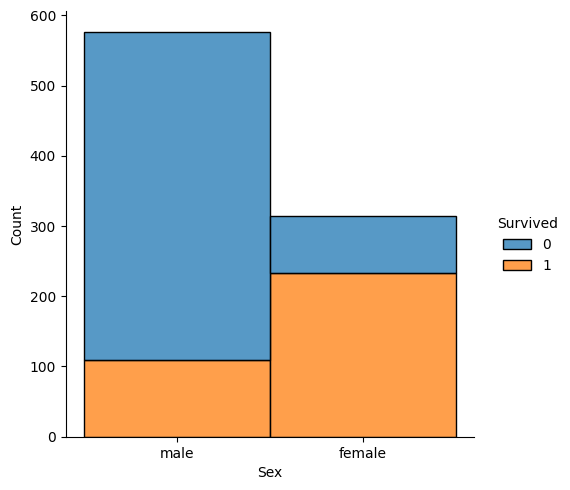

In [7]:
# check sex / survived dist
sns.displot(train_df,
            x='Sex', hue=label, multiple='stack')

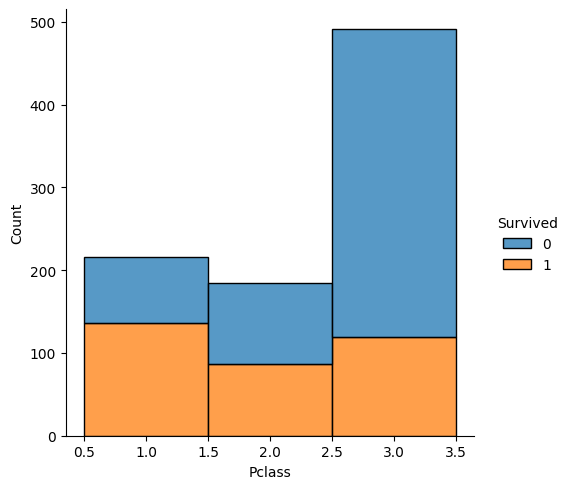

In [8]:
# check passenger class / survived dist
train_df['Pclass'] = train_df['Pclass'].astype('category')
sns.displot(train_df,
            x='Pclass', hue=label, multiple='stack', )

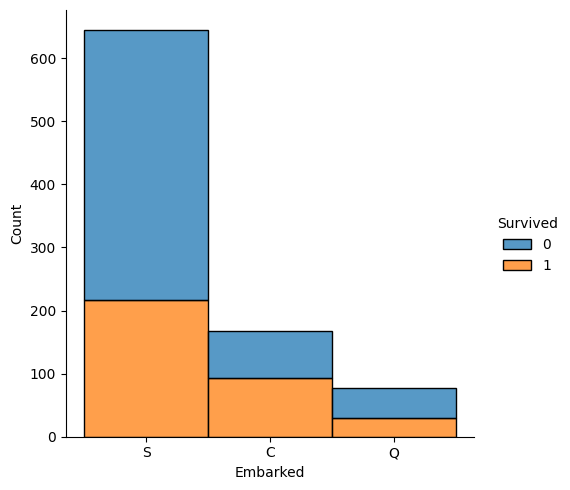

In [9]:
# check embarked / survived dist
sns.displot(train_df,
            x='Embarked', hue=label, multiple='stack', )

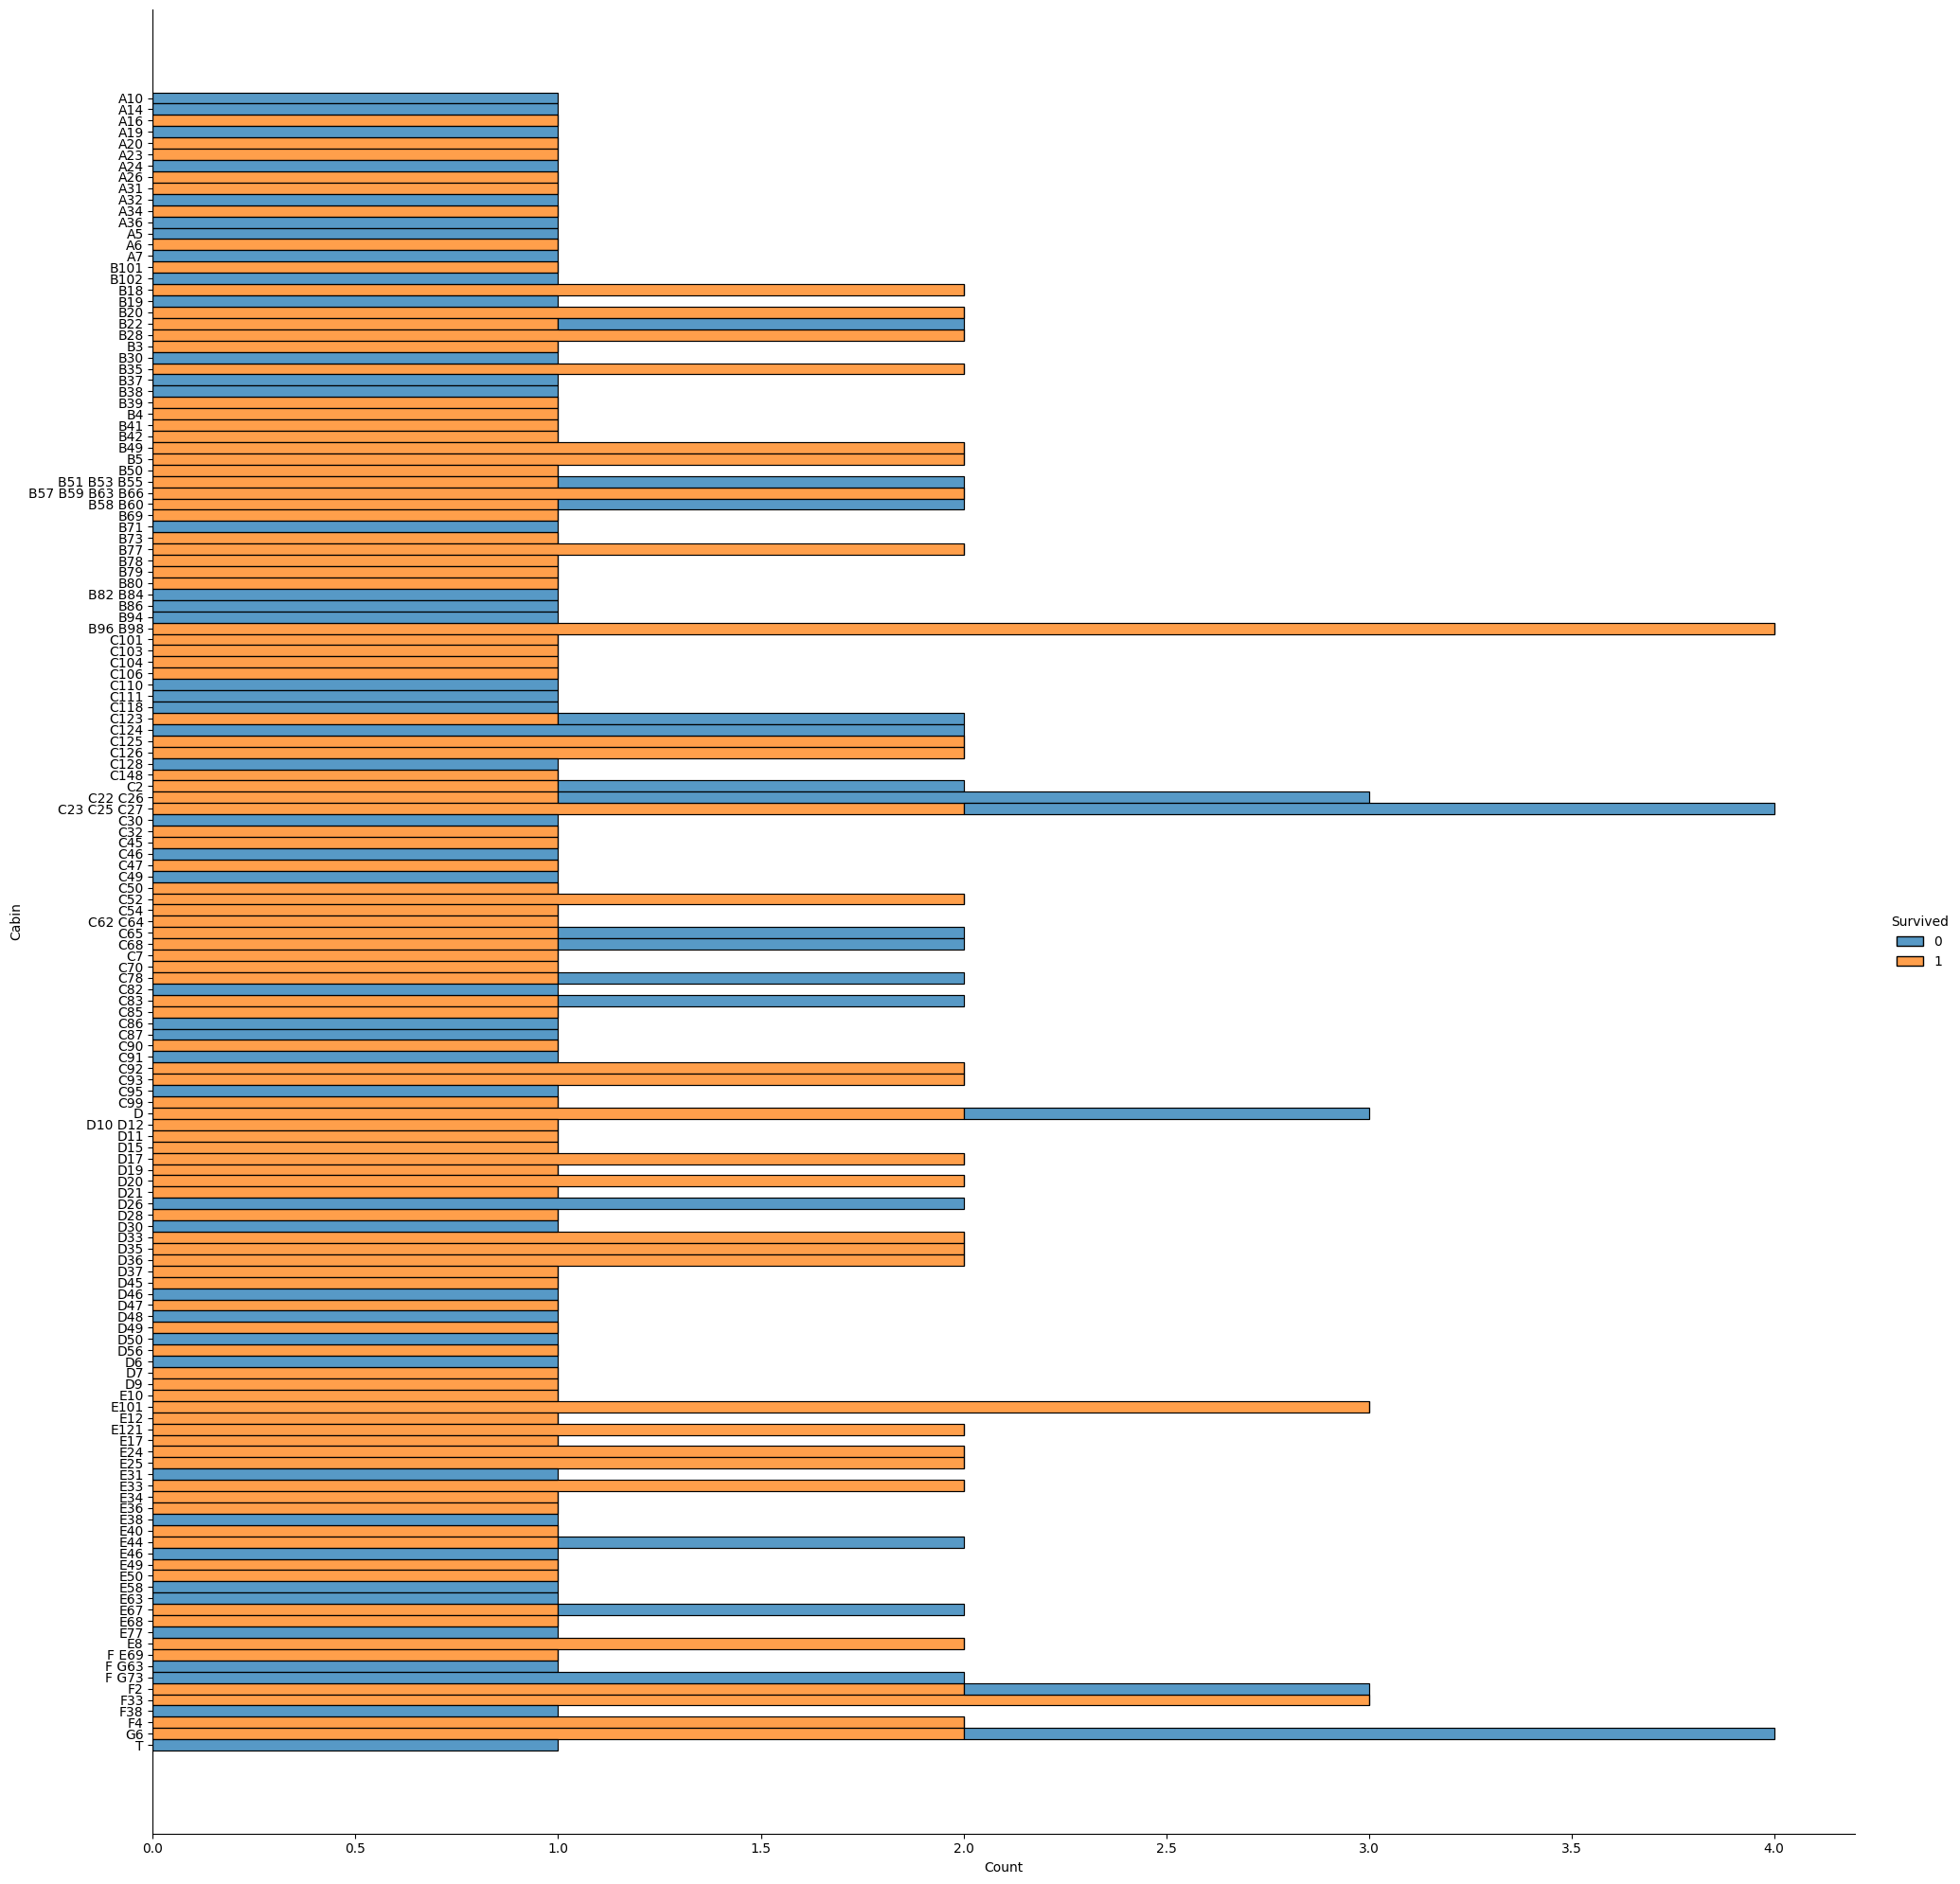

In [10]:
# check cabin / survived dist
sns.displot(train_df.sort_values(by='Cabin'),
            y='Cabin', hue=label, multiple='stack', height=20)

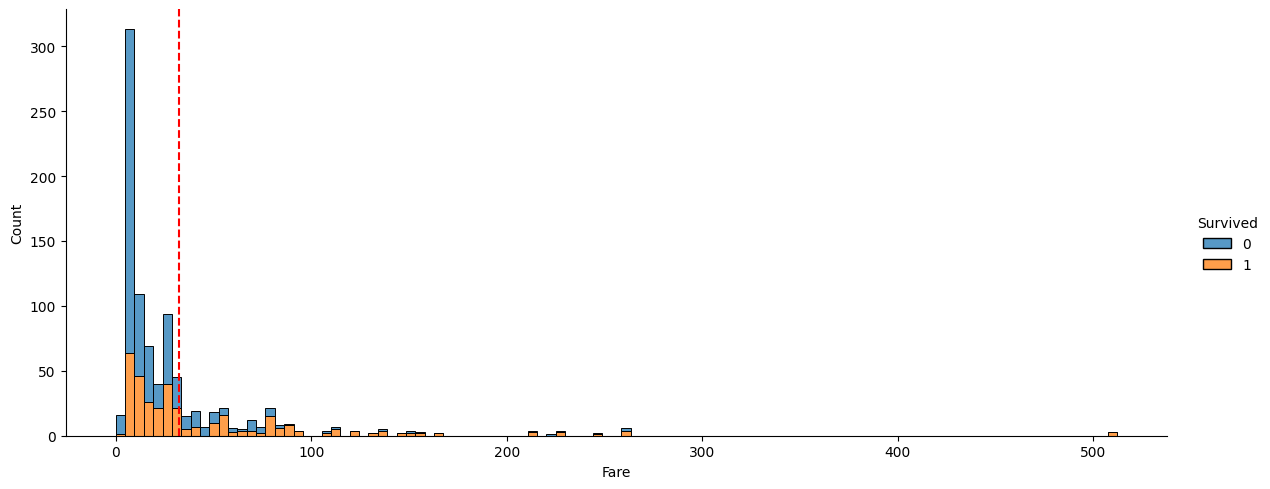

In [11]:
# check fare / survived dist
fare_distplot = sns.displot(train_df,
                            x='Fare', hue=label, multiple='stack', height=5, aspect=12/5)
fare_distplot.axes[0][0].axvline(train_df['Fare'].mean(), color='red', ls='--')

In [12]:
def get_query(fare: float) -> pd.Series:
    return train_df['Fare'] > fare

In [13]:
# now we deep dive into fare / survived relationship
# we first check the rate of passengers whose fare was over 500
train_df[get_query(500)][label].describe()

count    3.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Survived, dtype: float64

In [14]:
train_df[get_query(200)][label].describe()

count    20.000000
mean      0.700000
std       0.470162
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

In [15]:
train_df[get_query(100)][label].describe()

count    53.000000
mean      0.735849
std       0.445099
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

In [16]:
train_df[get_query(74)][label].describe()

count    97.000000
mean      0.762887
std       0.427522
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

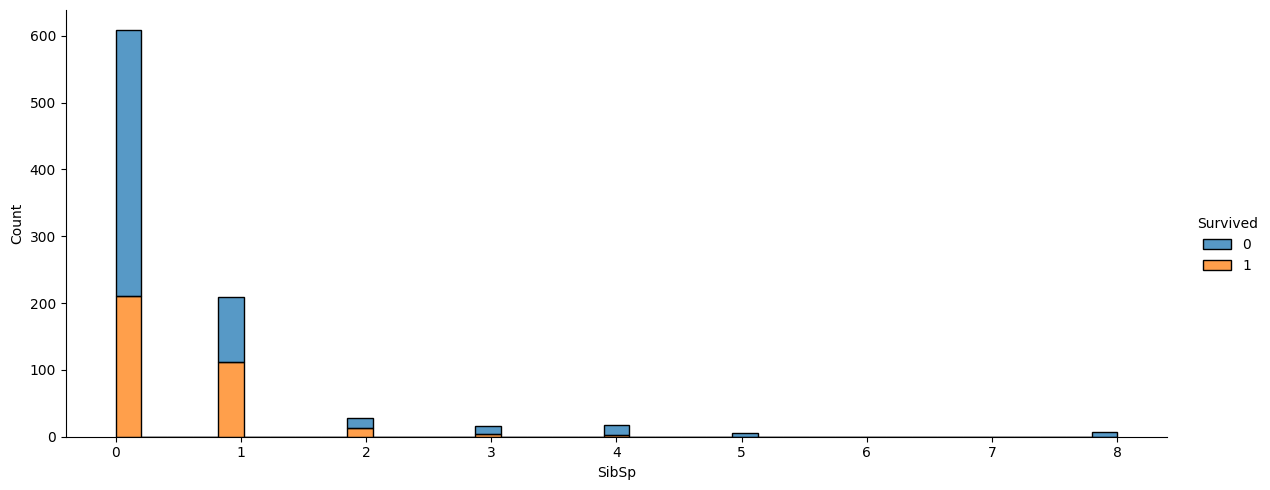

In [17]:
# check for sibling or spouse count / survived rate
sns.displot(train_df,
            x='SibSp', hue=label, multiple='stack', height=5, aspect=12/5)

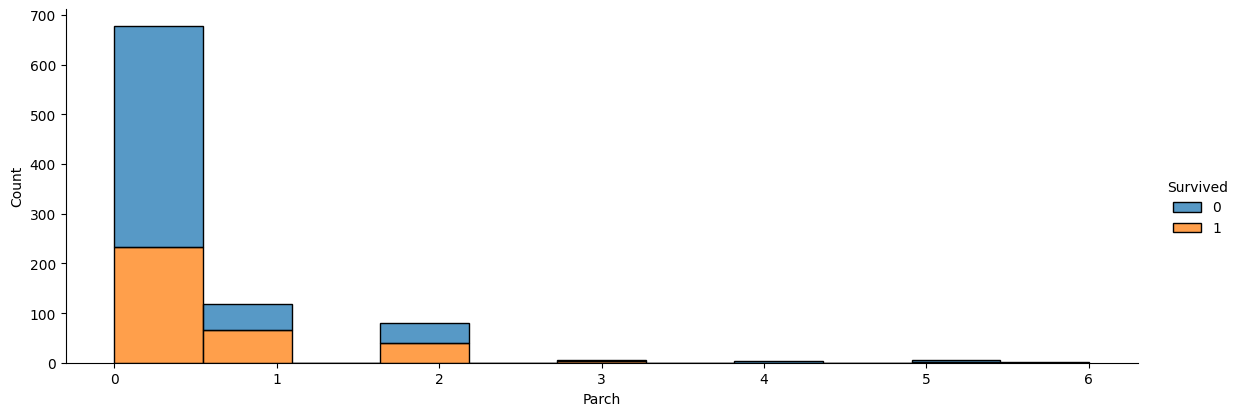

In [18]:
# check for parent children count / survived rate
sns.displot(train_df,
            x='Parch', hue=label, multiple='stack', height=4.27, aspect=11.7/4.27)

In [19]:
for col in train_df.columns:
    print(
        f'{col} na/all: {(len(train_df[pd.isna(train_df[col])]))/len(train_df)}')

PassengerId na/all: 0.0
Survived na/all: 0.0
Pclass na/all: 0.0
Name na/all: 0.0
Sex na/all: 0.0
Age na/all: 0.19865319865319866
SibSp na/all: 0.0
Parch na/all: 0.0
Ticket na/all: 0.0
Fare na/all: 0.0
Cabin na/all: 0.7710437710437711
Embarked na/all: 0.002244668911335578


In [ ]:
# we should not use Cabin feature, and remove rows with na age.